<a href="https://colab.research.google.com/github/Aerospacerr/Thesis/blob/main/DS_job.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import seaborn as sns
sns.set_style("dark")

from sklearn import preprocessing
from scipy.stats import skew, boxcox

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.f' % x)
pd.set_option('display.width', 170)

import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import lightgbm as lgb
import warnings

#pip install optuna
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
warnings.filterwarnings('ignore')

In [4]:
#Give the specified folder of given databases to load
distance="/content/drive/MyDrive/Case_Task/Continental/distance_small_sample.csv"

# Load the data from CSV file
data = pd.read_csv(distance)#, delimiter ='\s+', index_col=False)


In [5]:
data.head()

,speed,fcn_attribute,distance,urban
0,1,1,3,1
1,1,1,9,0
2,1,1,7,1
3,1,1,10,0
4,1,1,7,1


In [6]:
print(data.info())  # Display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445798 entries, 0 to 2445797
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   speed          int64  
 1   fcn_attribute  int64  
 2   distance       float64
 3   urban          float64
dtypes: float64(2), int64(2)
memory usage: 74.6 MB
None


In [7]:
# Display descriptive statistics
print(data.describe())


        speed  fcn_attribute  distance   urban
count 2445798        2445798   2445798 2351567
mean       13              3        28       1
std        11              1        23       0
min         1              1         0       0
25%         5              2        10       1
50%        10              3        21       1
75%        20              4        40       1
max        35              5       100       1


In [8]:
data.isnull().sum()

speed                0
fcn_attribute        0
distance             0
urban            94231
dtype: int64

In [9]:
# Display the first few rows of the dataset
print(data.head())

# Display information about the dataset
print(data.info())

# Descriptive statistics of the dataset
print(data.describe())

   speed  fcn_attribute  distance  urban
0      1              1         3      1
1      1              1         9      0
2      1              1         7      1
3      1              1        10      0
4      1              1         7      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445798 entries, 0 to 2445797
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   speed          int64  
 1   fcn_attribute  int64  
 2   distance       float64
 3   urban          float64
dtypes: float64(2), int64(2)
memory usage: 74.6 MB
None
        speed  fcn_attribute  distance   urban
count 2445798        2445798   2445798 2351567
mean       13              3        28       1
std        11              1        23       0
min         1              1         0       0
25%         5              2        10       1
50%        10              3        21       1
75%        20              4        40       1
max        35              5       100    

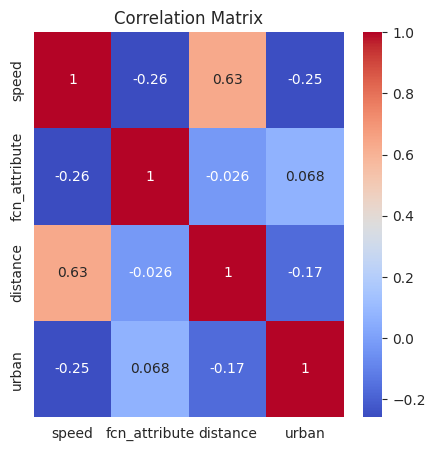

In [10]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



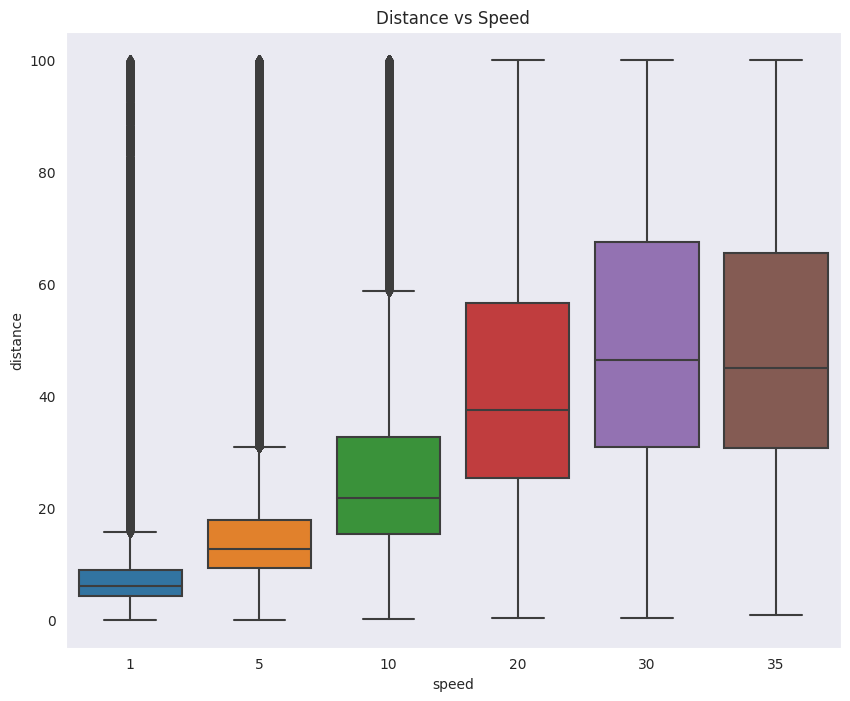

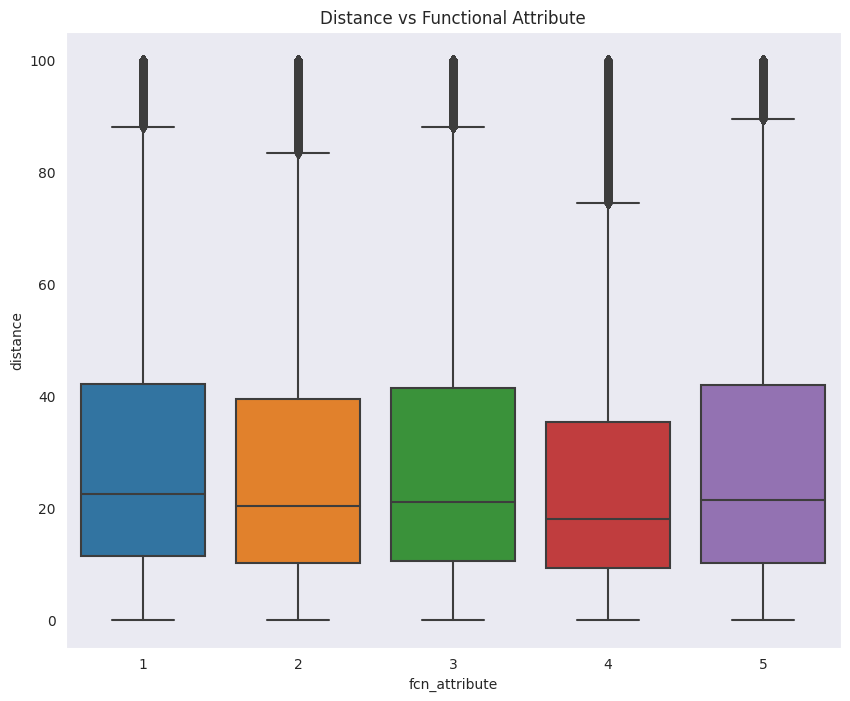

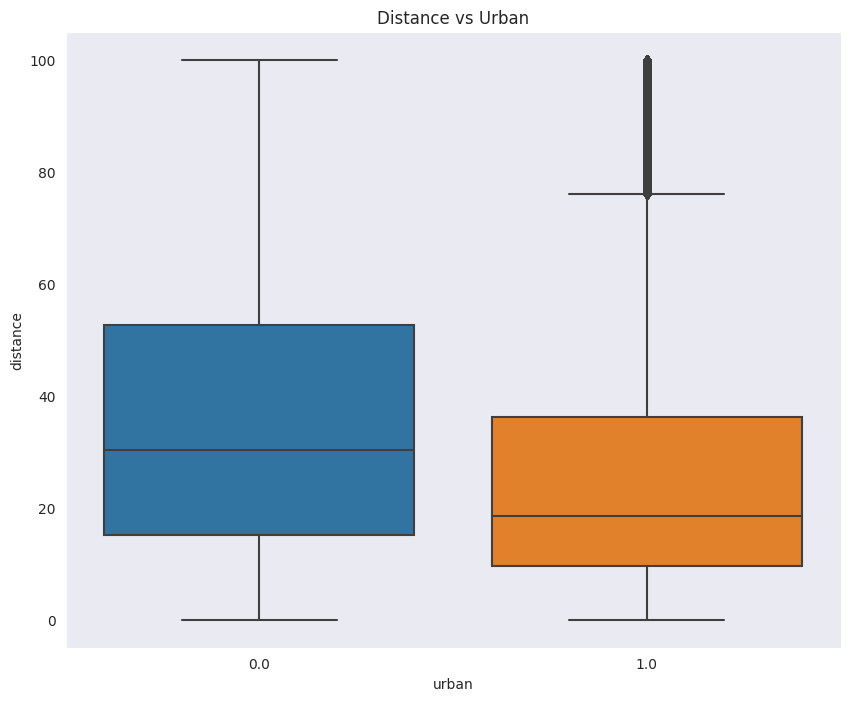

In [11]:
# Box plots to visualize the relationship between attributes and distance
plt.figure(figsize=(10, 8))
sns.boxplot(x='speed', y='distance', data=data)
plt.title('Distance vs Speed')
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x='fcn_attribute', y='distance', data=data)
plt.title('Distance vs Functional Attribute')
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x='urban', y='distance', data=data)
plt.title('Distance vs Urban')
plt.show()

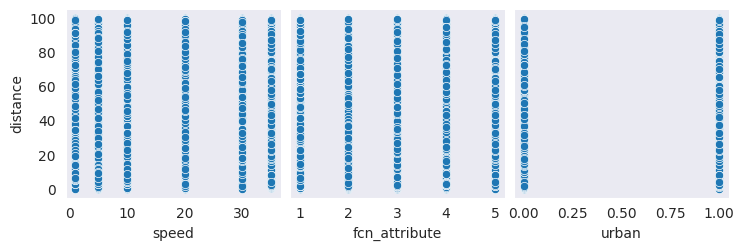

In [12]:
# Visualize the relationships between attributes and distance
sns.pairplot(data, x_vars=['speed', 'fcn_attribute', 'urban'], y_vars='distance', kind='scatter')
plt.show()

In [13]:
import pandas as pd
from sklearn.ensemble import IsolationForest



# Select the features to use for anomaly detection
features = ['speed', 'fcn_attribute', 'urban', 'distance']

# Create a subset of the data with only the selected features
data_subset = data[features]

# Instantiate the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model on the data
isolation_forest.fit(data_subset)

# Predict anomalies using the trained model
anomaly_preds = isolation_forest.predict(data_subset)
anomalies = data[anomaly_preds == -1]

if not anomalies.empty:
    print("Anomalies Detected:")
    print(anomalies)
else:
    print("No anomalies detected.")

ValueError: ignored

In [ ]:
# Plot the anomalies
plt.figure(figsize=(10, 8))
plt.scatter(data_subset['distance'], data_subset['speed'], color='blue', label='Normal')
plt.scatter(anomalies['distance'], anomalies['speed'], color='red', label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Speed')
plt.title('Isolation Forest Anomalies')
plt.legend()
plt.show()

In [ ]:
# Perform statistical tests (e.g., ANOVA) to assess significance
# Example ANOVA using speed and distance
from scipy.stats import f_oneway

groups = []
for attribute_value in data['fcn_attribute'].unique():
    group = data[data['fcn_attribute'] == attribute_value]['distance']
    groups.append(group)

statistic, p_value = f_oneway(*groups)
print('ANOVA p-value:', p_value)

In [ ]:
# Handle missing values
if data.isnull().sum().sum() > 0:
    data = data.dropna()  # Drop rows with missing values
    # Alternatively, you can handle missing values by imputation

# Convert categorical variables to numerical representations
categorical_cols = ['fcn_attribute', 'urban']
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Split the data into training and testing sets
X = data.drop('distance', axis=1)  # Features
y = data['distance']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the split datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

<Figure size 800x600 with 0 Axes>

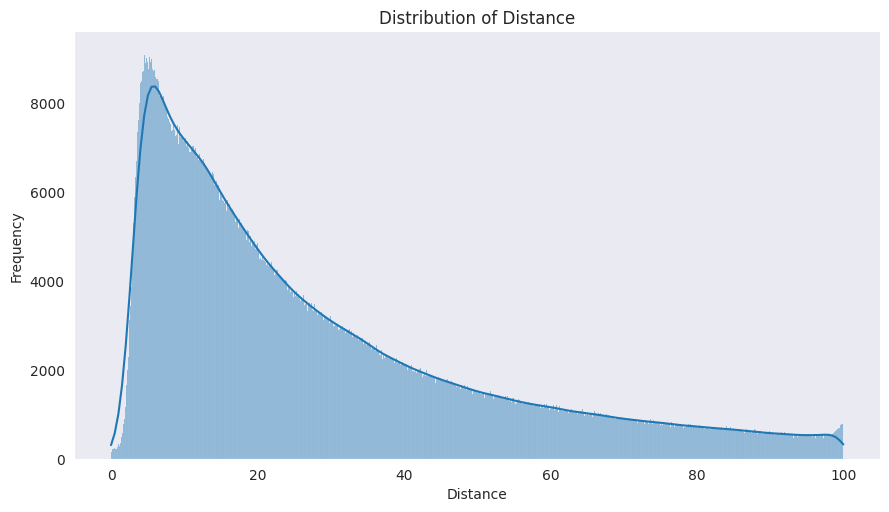

In [22]:

# Visual inspection: Distribution plot
min_x, max_x = 0, 100
plt.figure(figsize=(8, 6))
sns.displot(data['distance'], kde=True,  bins=1000, binrange=(min_x, max_x), legend=True, aspect=1.1,
                kde_kws={'clip': (min_x, max_x)})
plt.title('Distribution of Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

# Statistical methods: Identify outliers using z-score
z_scores = zscore(data['distance'])
threshold = 3  # Adjust this threshold as per your requirement

outliers = data[abs(z_scores) > threshold]
if not outliers.empty:
    print("Identified outliers:")
    print(outliers)

# Machine learning algorithms: Anomaly detection
# You can explore using machine learning-based anomaly detection algorithms
# such as Isolation Forest, One-Class SVM, or Local Outlier Factor
# Example using Isolation Forest:

from sklearn.ensemble import IsolationForest

# Prepare data for anomaly detection
X = data[['distance']]
clf = IsolationForest(contamination=0.05, random_state=42)
clf.fit(X)

# Predict outliers using the trained model
outliers_pred = clf.predict(X)
outliers_pred = pd.Series(outliers_pred).map({1: False, -1: True})  # Convert to boolean

outliers_detected = data[outliers_pred]
if not outliers_detected.empty:
    print("Anomalies detected:")
    print(outliers_detected)


<Figure size 800x600 with 0 Axes>

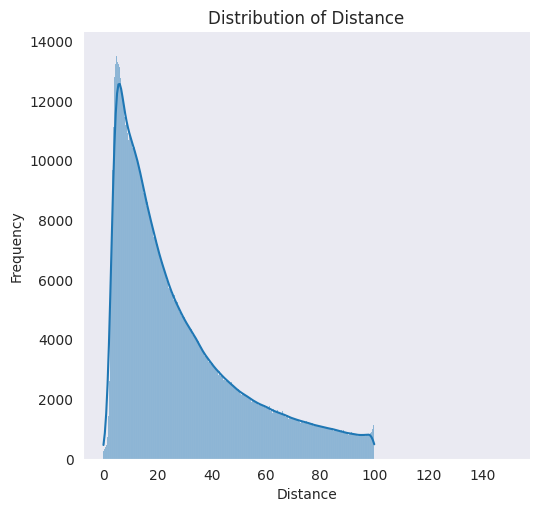

In [26]:

# Visual inspection: Distribution plot
min_x, max_x = 0, 150
plt.figure(figsize=(8, 6))
sns.displot(data['distance'], kde=True,  bins=1000, binrange=(min_x, max_x), legend=True, aspect=1.1,
                kde_kws={'clip': (min_x, 150)})
plt.title('Distribution of Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

In [28]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm, weibull_min, genpareto, expon



# Fit Log-Normal Distribution
lognorm_params = lognorm.fit(data['distance'])
print("Log-Normal Distribution Parameters:", lognorm_params)

# Fit Weibull Distribution
weibull_params = weibull_min.fit(data['distance'])
print("Weibull Distribution Parameters:", weibull_params)

# Fit Generalized Pareto Distribution (GPD)
gpd_params = genpareto.fit(data['distance'])
print("Generalized Pareto Distribution Parameters:", gpd_params)

# Fit Exponential Distribution
exponential_params = expon.fit(data['distance'])
print("Exponential Distribution Parameters:", exponential_params)


Log-Normal Distribution Parameters: (1.3838682565008016, 0.0005862521706379265, 2.414761370400509)
Weibull Distribution Parameters: (1.2546081990022873, 0.0005898869784849968, 30.684671387213022)
Generalized Pareto Distribution Parameters: (-0.27159919028324575, 0.0005959997868611803, 36.37209688685692)
Exponential Distribution Parameters: (0.000596, 28.44533751378036)


Kolmogorov-Smirnov Test:
Log-Normal: KstestResult(statistic=0.6298115110408309, pvalue=0.0, statistic_location=6.5658, statistic_sign=-1)
Weibull: KstestResult(statistic=0.045541096937667114, pvalue=0.0, statistic_location=17.8938, statistic_sign=1)
GPD: KstestResult(statistic=0.06561533739994792, pvalue=0.0, statistic_location=3.33753, statistic_sign=-1)
Exponential: KstestResult(statistic=0.08852927122055433, pvalue=0.0, statistic_location=3.73252, statistic_sign=-1)


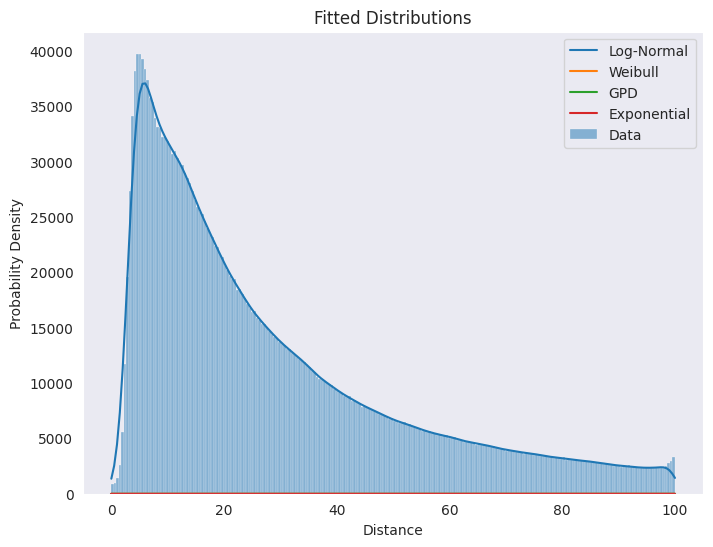

In [29]:

from scipy.stats import lognorm, weibull_min, genpareto, expon, kstest

# Fit Log-Normal Distribution
lognorm_params = lognorm.fit(data['distance'])
lognorm_dist = lognorm(*lognorm_params)

# Fit Weibull Distribution
weibull_params = weibull_min.fit(data['distance'])
weibull_dist = weibull_min(*weibull_params)

# Fit Generalized Pareto Distribution (GPD)
gpd_params = genpareto.fit(data['distance'])
gpd_dist = genpareto(*gpd_params)

# Fit Exponential Distribution
exponential_params = expon.fit(data['distance'])
exponential_dist = expon(*exponential_params)

# Perform goodness of fit tests
print("Kolmogorov-Smirnov Test:")
print("Log-Normal:", kstest(data['distance'], lognorm_dist.cdf))
print("Weibull:", kstest(data['distance'], weibull_dist.cdf))
print("GPD:", kstest(data['distance'], gpd_dist.cdf))
print("Exponential:", kstest(data['distance'], exponential_dist.cdf))

# Visualize the fitted distributions
plt.figure(figsize=(8, 6))
sns.histplot(data['distance'], kde=True, label='Data')
x = np.linspace(data['distance'].min(), data['distance'].max(), 100)
plt.plot(x, lognorm_dist.pdf(x), label='Log-Normal')
plt.plot(x, weibull_dist.pdf(x), label='Weibull')
plt.plot(x, gpd_dist.pdf(x), label='GPD')
plt.plot(x, exponential_dist.pdf(x), label='Exponential')
plt.title('Fitted Distributions')
plt.xlabel('Distance')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import sinh_arcsinh
from scipy.stats import sinh_arcsinh

# Load the data from the CSV file
data = pd.read_csv('distance_small_sample.csv')

# Select the 'distance' column for modeling
distance_data = data['distance']

# Fit the sinh-arcsinh distribution to the data
sas_params = sinh_arcsinh.fit(distance_data)

# Extract the fitted parameters
loc = sas_params[-2]
scale = sas_params[-1]

# Generate synthetic distance values based on the fitted distribution
synthetic_distances = np.linspace(5, 150, 1000)
pdf_values = sinh_arcsinh.pdf(synthetic_distances, *sas_params)

# Plot the histogram of the original data
plt.figure(figsize=(10, 6))
plt.hist(distance_data, bins=20, density=True, alpha=0.7, label='Original Data')

# Plot the fitted sinh-arcsinh distribution
plt.plot(synthetic_distances, pdf_values, color='red', label='Sinh-Arcsinh Distribution')
plt.xlabel('Distance')
plt.ylabel('Probability Density')
plt.title('Sinh-Arcsinh Distribution Fit')
plt.legend()
plt.show()


ImportError: ignored

In [33]:
pip install --upgrade scipy.stats


ERROR: Could not find a version that satisfies the requirement scipy.stats (from versions: none)
ERROR: No matching distribution found for scipy.stats
